Random forest classification example
https://www.datacamp.com/tutorial/random-forests-classifier-python

In [1]:
pip install scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [5]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [6]:
import numpy as np

Modelling

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [8]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [9]:
from scipy.stats import randint

Tree Visualisation

In [10]:
from sklearn.tree import export_graphviz

In [11]:
from IPython.display import Image

In [13]:
pip install graphviz -q

Note: you may need to restart the kernel to use updated packages.


In [26]:
conda install graphviz -q

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - bioconda
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    atk-1.0-2.38.0             |       h04ea711_2         348 KB  conda-forge
    expat-2.6.2                |       h59595ed_0         134 KB  conda-forge
    fonts-conda-ecosystem-1    |                0           4 KB  conda-forge
    fonts-conda-forge-1        |                0           4 KB  conda-forge
    gdk-pixbuf-2.42.12         |       hb9ae30d_0         516 KB  conda-forge
    graphviz-12.0.0            |       hba01fac_0         2.2 MB  conda-forge
    gtk2-2.24.33               |       h6470451_5         6.2 MB  conda-forge
    gts-0.7.6                  |       h977cf35_4         311 KB  conda-forg

In [14]:
import graphviz

In [15]:
# load dataset
bank_data_full = pd.read_csv("bank-additional-full.csv", delimiter=';')

In [16]:
bank_data = bank_data_full[['age', 'default', 'cons.price.idx', 'cons.conf.idx','y']]

In [17]:
bank_data

,age,default,cons.price.idx,cons.conf.idx,y
0,56,no,93.994,-36.4,no
1,57,unknown,93.994,-36.4,no
2,37,no,93.994,-36.4,no
3,40,no,93.994,-36.4,no
4,56,no,93.994,-36.4,no
...,...,...,...,...,...
41183,73,no,94.767,-50.8,yes
41184,46,no,94.767,-50.8,no
41185,56,no,94.767,-50.8,no
41186,44,no,94.767,-50.8,yes


In [18]:
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})

/tmp/ipykernel_311/2639503972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})


In [19]:
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

/tmp/ipykernel_311/1640493293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})


Splitting the data

In [20]:
# Split the data into features (X) and target (y)
X = bank_data.drop('y', axis=1)
y = bank_data['y']

In [21]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Create and train the classifier

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Predict the data

In [23]:
y_pred = rf.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8935421218742413


Visualizing the results

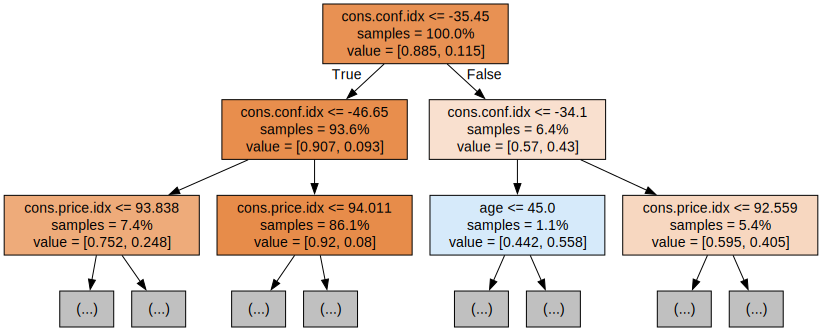

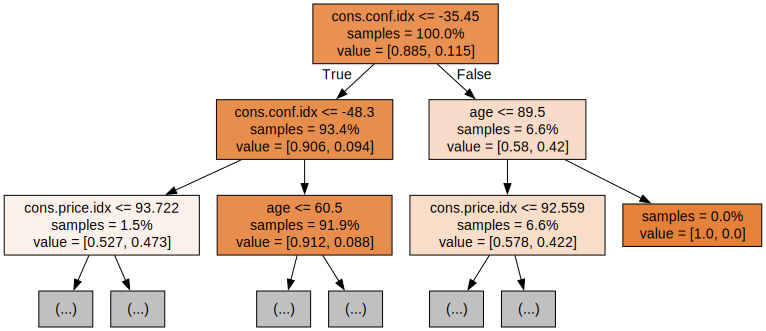

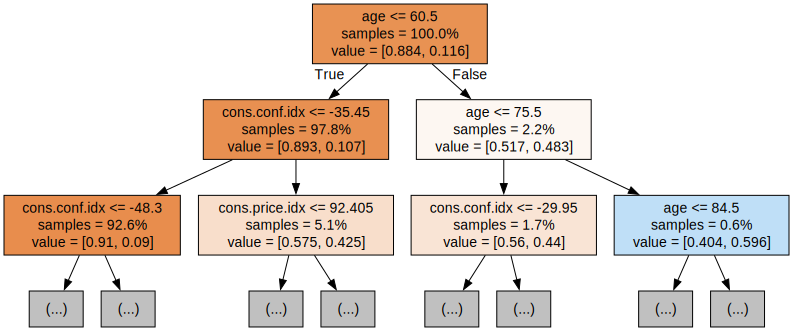

In [27]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [28]:
#Create parameters for Randomized search
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

In [29]:
# Create a random forest classifier
rf = RandomForestClassifier()

In [30]:
# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

In [31]:
# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f755bc97950>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7694bd19d0>})

In [32]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

In [33]:
# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 285}


In [34]:
print('Best score:', rand_search.best_score_) 

Best score: 0.8882852807283765


In [35]:
best_rf

RandomForestClassifier(max_depth=5, n_estimators=285)

#Prediction

In [39]:
pip install matplotlib -q

Note: you may need to restart the kernel to use updated packages.


In [37]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

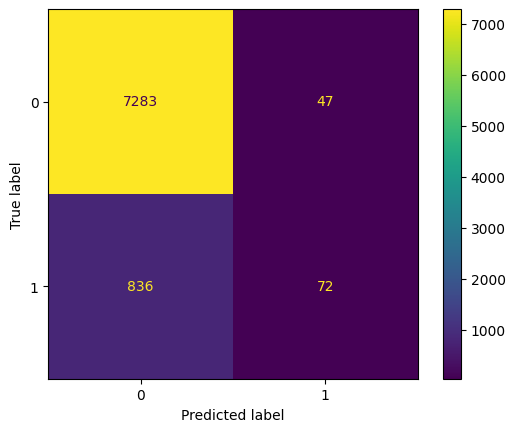

In [40]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [41]:
#Calculate accuracy, precision and recall for the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [42]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8928137897547949
Precision: 0.6050420168067226
Recall: 0.07929515418502203


Plot importances of each feature

In [49]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

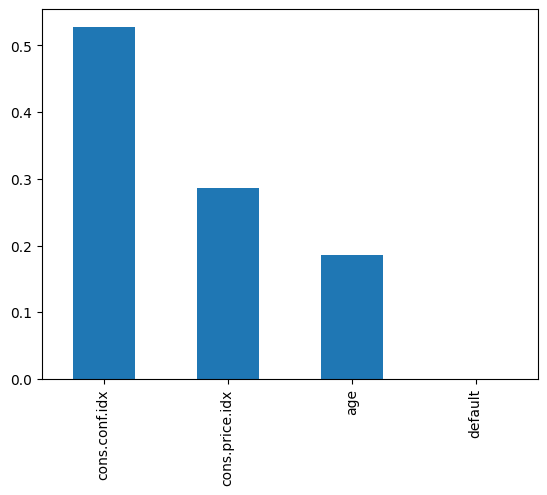

In [50]:
# Plot a simple bar chart
feature_importances.plot.bar();